### 원, 삼각형, 사각형 구분하기
- 어려운 테스트 문제를 "데이터 부풀리기"를 이용하여 데이터를 많이 생성
- 기존 CNN 모델을 그대로 사용

In [1]:
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

- 데이터셋 생성하기

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,          # randomly rotata images in the range (degree 0 to 15)
    width_shift_range=0.1,      # randomly shift images horizontally
    height_shift_range=0.1,     # randomly shift images vertically
    shear_range=0.5,            # 도형의 기울기
    zoom_range=[0.8,1.5],        # 0.8~1.5 배 크기로 임의로 확대/축소
    horizontal_flip=True,       # randomly flip images
    vertical_flip=False,
    fill_mode='nearest',        # set mode for filling points outside the input boundaries
)


In [3]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

img = load_img('data/hard_handwriting_shape/train/triangle/triangle001.png')
x = img_to_array(img)
x.shape

(24, 24, 3)

In [4]:
# shape을 (1, 24, 24, 3)으로 변경
x = x.reshape(-1, 24, 24, 3)
x.shape

(1, 24, 24, 3)

- 데이터 부풀리기를 통해서 만들어지는 새로운 도형 이미지 확인

In [5]:
import os
if not os.path.exists('data/preview'):
    os.mkdir('data/preview')

In [13]:
count = 0
for batch in train_datagen.flow(x, batch_size=1, save_to_dir='data/preview', save_prefix='pre'):
    count += 1
    if count > 30:
        break

ValueError: num must be an integer with 1 <= num <= 30, not 31

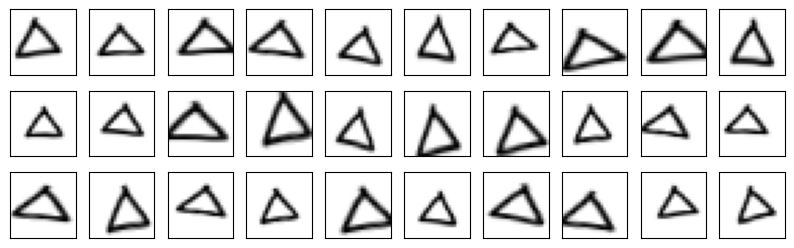

In [14]:
plt.figure(figsize=(10,3))
for i, fname in enumerate(glob('data/preview/*.png')):
    img = Image.open(fname)
    plt.subplot(3, 10, i+1)
    plt.imshow(img), plt.xticks([]), plt.yticks([])
plt.show()

- data generator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_data_generator = train_datagen.flow_from_directory(
    'data/hard_handwriting_shape/train',
    target_size=(24,24),
    batch_size=3,
    class_mode='categorical'    
)

Found 15 images belonging to 3 classes.


In [ ]:
test_data_generator.filenames[0]

'circle\\circle021.png'

- 아무것도 안하고 모델 정의/설정/학습/평가

In [ ]:
import numpy as np
import tensorflow as tf
seed = 2023
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(24, 24, 3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               819328    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                        

In [ ]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [ ]:
model.fit(
    train_data_generator,
    epochs=50,
    validation_data=test_data_generator,
    steps_per_epoch=15,         # 총 데이터 수(45) / batch_size(3) = 15
    validation_steps=5          # 총 데이터 수(15) / batch_size(3) = 5
)

Epoch 1/50
15/15 [==============================] - 1s 30ms/step - loss: 1.0874 - accuracy: 0.5778 - val_loss: 1.2518 - val_accuracy: 0.3333
Epoch 2/50
15/15 [==============================] - 0s 18ms/step - loss: 0.2453 - accuracy: 0.9778 - val_loss: 2.4327 - val_accuracy: 0.3333
Epoch 3/50
15/15 [==============================] - 0s 16ms/step - loss: 0.0286 - accuracy: 1.0000 - val_loss: 3.3791 - val_accuracy: 0.3333
Epoch 4/50
15/15 [==============================] - 0s 18ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 4.4456 - val_accuracy: 0.3333
Epoch 5/50
15/15 [==============================] - 0s 17ms/step - loss: 4.7382e-04 - accuracy: 1.0000 - val_loss: 4.6192 - val_accuracy: 0.3333
Epoch 6/50
15/15 [==============================] - 0s 18ms/step - loss: 2.8908e-04 - accuracy: 1.0000 - val_loss: 4.6960 - val_accuracy: 0.3333
Epoch 7/50
15/15 [==============================] - 0s 20ms/step - loss: 2.1860e-04 - accuracy: 1.0000 - val_loss: 4.7972 - val_accuracy: 0.3333
E

In [ ]:
model.evaluate(test_data_generator)

5/5 [==============================] - 0s 4ms/step - loss: 5.8841 - accuracy: 0.3333 


[5.884130954742432, 0.3333333432674408]